---

**Sincronización con Drive**

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

**Importar Librerías**

---

In [2]:
import pandas as pd
import numpy as np
import ast
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

---

**Función para cargar los archivos JSON**

---

In [3]:
def load_json_lines(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(ast.literal_eval(line))
    return pd.DataFrame(data)

---

**EDA:** *australian_user_reviews*

---




In [4]:
#Carga y muestra el archivo
df_reviews = load_json_lines('/content/drive/MyDrive/MLOPS - ALLAN/1- DATASETS-FORMATO JSON/australian_user_reviews.json')
df_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [5]:
'''# Verificar las columnas disponibles en df_games
print(df_reviews.columns)

# Eliminar duplicados basados en la columna 'id'
df_reviews_sin_duplicados = df_reviews.drop_duplicates(subset=['user_id'])

# Imprimir la información actualizada
print("Número de filas antes de eliminar duplicados:", len(df_reviews))
print("Número de filas después de eliminar duplicados:", len(df_reviews_sin_duplicados))'''

'# Verificar las columnas disponibles en df_games\nprint(df_reviews.columns)\n\n# Eliminar duplicados basados en la columna \'id\'\ndf_reviews_sin_duplicados = df_reviews.drop_duplicates(subset=[\'user_id\'])\n\n# Imprimir la información actualizada\nprint("Número de filas antes de eliminar duplicados:", len(df_reviews))\nprint("Número de filas después de eliminar duplicados:", len(df_reviews_sin_duplicados))'

In [6]:
df_reviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [7]:
# Extrae la columna reviews anidada (aplanado de columna)
data_reviews = pd.json_normalize(df_reviews.reviews)
data_reviews.head()

,0,1,2,3,4,5,6,7,8,9
0,"{'funny': '', 'posted': 'Posted November 5, 20...","{'funny': '', 'posted': 'Posted July 15, 2011....","{'funny': '', 'posted': 'Posted April 21, 2011...",None,None,None,None,None,None,None
1,"{'funny': '', 'posted': 'Posted June 24, 2014....","{'funny': '', 'posted': 'Posted September 8, 2...","{'funny': '', 'posted': 'Posted November 29, 2...",None,None,None,None,None,None,None
2,"{'funny': '', 'posted': 'Posted February 3.', ...","{'funny': '', 'posted': 'Posted December 4, 20...","{'funny': '', 'posted': 'Posted November 3, 20...","{'funny': '', 'posted': 'Posted October 15, 20...","{'funny': '', 'posted': 'Posted October 15, 20...","{'funny': '', 'posted': 'Posted October 15, 20...",None,None,None,None
3,"{'funny': '', 'posted': 'Posted October 14, 20...","{'funny': '', 'posted': 'Posted July 28, 2012....","{'funny': '', 'posted': 'Posted June 2, 2012.'...","{'funny': '', 'posted': 'Posted June 29, 2014....","{'funny': '', 'posted': 'Posted November 22, 2...","{'funny': '', 'posted': 'Posted February 23, 2...",None,None,None,None
4,"{'funny': '3 people found this review funny', ...","{'funny': '1 person found this review funny', ...","{'funny': '2 people found this review funny', ...","{'funny': '', 'posted': 'Posted July 11, 2013....",None,None,None,None,None,None


In [8]:
# Visualizar las primeras filas de df_reviews
print("Primeras filas de df_reviews:")
print(df_reviews.head())

# Información básica sobre df_reviews
print("\nInformación de df_reviews:")
print(df_reviews.info())

# Chequeo de nulos en df_reviews
print("\nNulos en df_reviews:")
print(df_reviews.isnull().sum())

# Análisis estadístico de datos en df_reviews
print("\nEstadísticas descriptivas de df_reviews:")
print(df_reviews.describe())


Primeras filas de df_reviews:
             user_id                                           user_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1            js41637               http://steamcommunity.com/id/js41637   
2          evcentric             http://steamcommunity.com/id/evcentric   
3              doctr                 http://steamcommunity.com/id/doctr   
4          maplemage             http://steamcommunity.com/id/maplemage   

                                             reviews  
0  [{'funny': '', 'posted': 'Posted November 5, 2...  
1  [{'funny': '', 'posted': 'Posted June 24, 2014...  
2  [{'funny': '', 'posted': 'Posted February 3.',...  
3  [{'funny': '', 'posted': 'Posted October 14, 2...  
4  [{'funny': '3 people found this review funny',...  

Información de df_reviews:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    

In [9]:
#Muestra los datos no nulos del dataFrame
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       25771 non-null  object
 1   1       12106 non-null  object
 2   2       7425 non-null   object
 3   3       4864 non-null   object
 4   4       3335 non-null   object
 5   5       2331 non-null   object
 6   6       1585 non-null   object
 7   7       1022 non-null   object
 8   8       597 non-null    object
 9   9       269 non-null    object
dtypes: object(10)
memory usage: 2.0+ MB


In [10]:
# Muestra el porcentajes de datos nulos por columnas
porcentajes_nulos = (data_reviews.isnull().mean() * 100).round(2)
porcentajes_nulos

0     0.11
1    53.08
2    71.22
3    81.15
4    87.07
5    90.96
6    93.86
7    96.04
8    97.69
9    98.96
dtype: float64

In [11]:
# Explora columna 0 del DataFrame
data_reviews[0]  # Se observa que es una columna anidada

0        {'funny': '', 'posted': 'Posted November 5, 20...
1        {'funny': '', 'posted': 'Posted June 24, 2014....
2        {'funny': '', 'posted': 'Posted February 3.', ...
3        {'funny': '', 'posted': 'Posted October 14, 20...
4        {'funny': '3 people found this review funny', ...
                               ...                        
25794    {'funny': '', 'posted': 'Posted May 31.', 'las...
25795    {'funny': '', 'posted': 'Posted June 17.', 'la...
25796    {'funny': '1 person found this review funny', ...
25797    {'funny': '', 'posted': 'Posted July 21.', 'la...
25798    {'funny': '1 person found this review funny', ...
Name: 0, Length: 25799, dtype: object

In [12]:
# Extrae la columna 0 anidada (aplanado de columna)
data_reviews_col_0 = pd.json_normalize(data_reviews[0])
data_reviews_col_0.head()

,funny,posted,last_edited,item_id,helpful,recommend,review
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
2,,Posted February 3.,,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...
3,,"Posted October 14, 2013.",,250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...
4,3 people found this review funny,"Posted April 15, 2014.",,211420,35 of 43 people (81%) found this review helpful,True,Git gud


In [13]:
# Explora columna 1 del DataFrame
data_reviews[1]  # Se observa que es una columna anidada

0        {'funny': '', 'posted': 'Posted July 15, 2011....
1        {'funny': '', 'posted': 'Posted September 8, 2...
2        {'funny': '', 'posted': 'Posted December 4, 20...
3        {'funny': '', 'posted': 'Posted July 28, 2012....
4        {'funny': '1 person found this review funny', ...
                               ...                        
25794                                                 None
25795                                                 None
25796                                                 None
25797    {'funny': '', 'posted': 'Posted July 10.', 'la...
25798    {'funny': '', 'posted': 'Posted July 20.', 'la...
Name: 1, Length: 25799, dtype: object

In [14]:
# Extrae la columna 1 anidada (aplanado de columna)
data_reviews_col_1 = pd.json_normalize(data_reviews[1])
data_reviews_col_1.head()

,funny,posted,last_edited,item_id,helpful,recommend,review
0,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
1,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
2,,"Posted December 4, 2015.","Last edited December 5, 2015.",370360,No ratings yet,True,"""Run for fun? What the hell kind of fun is that?"""
3,,"Posted July 28, 2012.",,20920,1 of 1 people (100%) found this review helpful,True,"Really Really Really Great Game, very good sto..."
4,1 person found this review funny,"Posted December 23, 2013.",,211820,12 of 16 people (75%) found this review helpful,True,"It's like Terraria, you play for 9 hours strai..."


In [15]:
# Explora columna 2 del DataFrame
data_reviews[2]  # Se observa que es una columna anidada

0        {'funny': '', 'posted': 'Posted April 21, 2011...
1        {'funny': '', 'posted': 'Posted November 29, 2...
2        {'funny': '', 'posted': 'Posted November 3, 20...
3        {'funny': '', 'posted': 'Posted June 2, 2012.'...
4        {'funny': '2 people found this review funny', ...
                               ...                        
25794                                                 None
25795                                                 None
25796                                                 None
25797    {'funny': '', 'posted': 'Posted July 10.', 'la...
25798    {'funny': '', 'posted': 'Posted July 2.', 'las...
Name: 2, Length: 25799, dtype: object

In [16]:
# Extrae la columna 2 anidada (aplanado de columna)
data_reviews_col_2 = pd.json_normalize(data_reviews[2])
data_reviews_col_2.head()

,funny,posted,last_edited,item_id,helpful,recommend,review
0,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
1,,"Posted November 29, 2013.",,239030,1 of 4 people (25%) found this review helpful,True,Very fun little game to play when your bored o...
2,,"Posted November 3, 2014.",,237930,No ratings yet,True,"Elegant integration of gameplay, story, world ..."
3,,"Posted June 2, 2012.",,204100,1 of 1 people (100%) found this review helpful,True,"Just buy it already. Great Story, Great Multip..."
4,2 people found this review funny,"Posted March 14, 2014.",,730,5 of 5 people (100%) found this review helpful,True,"Hold shift to win, Hold CTRL to lose."


In [17]:
# Explora columna 3 del DataFrame
data_reviews[3]  # Se observa que es una columna anidada

0                                                     None
1                                                     None
2        {'funny': '', 'posted': 'Posted October 15, 20...
3        {'funny': '', 'posted': 'Posted June 29, 2014....
4        {'funny': '', 'posted': 'Posted July 11, 2013....
                               ...                        
25794                                                 None
25795                                                 None
25796                                                 None
25797    {'funny': '', 'posted': 'Posted July 8.', 'las...
25798                                                 None
Name: 3, Length: 25799, dtype: object

In [18]:
# Extrae la columna 3 anidada (aplanado de columna)
data_reviews_col_3 = pd.json_normalize(data_reviews[3])
data_reviews_col_3.head()

,funny,posted,last_edited,item_id,helpful,recommend,review
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,"Posted October 15, 2014.",,263360,No ratings yet,True,"Random drops and random quests, with stat poin..."
3,,"Posted June 29, 2014.",,224600,1 of 2 people (50%) found this review helpful,True,"It was a great game from what I played, right ..."
4,,"Posted July 11, 2013.",,204300,No ratings yet,True,"OH YES, THIS GAME IS THE BEST, THEY ADD STUFF ..."


In [19]:
# Explora columna 4 del DataFrame
data_reviews[4]  # Se observa que es una columna anidada

0                                                     None
1                                                     None
2        {'funny': '', 'posted': 'Posted October 15, 20...
3        {'funny': '', 'posted': 'Posted November 22, 2...
4                                                     None
                               ...                        
25794                                                 None
25795                                                 None
25796                                                 None
25797                                                 None
25798                                                 None
Name: 4, Length: 25799, dtype: object

In [20]:
# Extrae la columna 4 anidada (aplanado de columna)
data_reviews_col_4 = pd.json_normalize(data_reviews[4])
data_reviews_col_4.head()

,funny,posted,last_edited,item_id,helpful,recommend,review
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,"Posted October 15, 2014.",,107200,No ratings yet,True,Fun balance of tactics and strategy. Potentia...
3,,"Posted November 22, 2012.",,207610,No ratings yet,True,The ending to this game is.... ♥♥♥♥♥♥♥.... Jus...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Explora columna 5 del DataFrame
data_reviews[5]  # Se observa que es una columna anidada

0                                                     None
1                                                     None
2        {'funny': '', 'posted': 'Posted October 15, 20...
3        {'funny': '', 'posted': 'Posted February 23, 2...
4                                                     None
                               ...                        
25794                                                 None
25795                                                 None
25796                                                 None
25797                                                 None
25798                                                 None
Name: 5, Length: 25799, dtype: object

In [22]:
# Extrae la columna 5 anidada (aplanado de columna)
data_reviews_col_5 = pd.json_normalize(data_reviews[5])
data_reviews_col_5.head()

,funny,posted,last_edited,item_id,helpful,recommend,review
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,"Posted October 15, 2014.",,224500,No ratings yet,True,"Fun world builder, with plenty of option of ho..."
3,,"Posted February 23, 2012.",,108710,No ratings yet,True,"Alan wake is a really good game, the light eff..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [24]:
# Elimina la columna reviews (anidada)
df_reviews.drop(columns='reviews', inplace=True)

In [25]:
# Une los DataFrames verticalmente
data_reviews_filas = pd.concat([data_reviews_col_0, data_reviews_col_1, data_reviews_col_2, data_reviews_col_3, data_reviews_col_4, data_reviews_col_5], ignore_index=True)
data_reviews_filas

,funny,posted,last_edited,item_id,helpful,recommend,review
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
2,,Posted February 3.,,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...
3,,"Posted October 14, 2013.",,250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...
4,3 people found this review funny,"Posted April 15, 2014.",,211420,35 of 43 people (81%) found this review helpful,True,Git gud
...,...,...,...,...,...,...,...
154789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154792,NaN,NaN,NaN,NaN,NaN,NaN,NaN


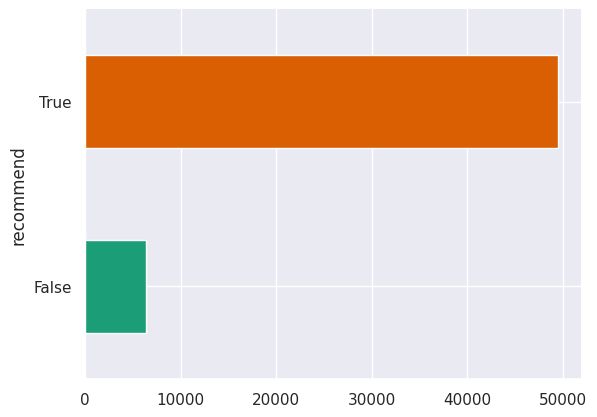

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
data_reviews_filas.groupby('recommend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
 # Une los DataFrames verticalmente
data_reviews_final = pd.concat([df_reviews, data_reviews_filas],axis=1)
data_reviews_final

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
2,evcentric,http://steamcommunity.com/id/evcentric,,Posted February 3.,,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...
3,doctr,http://steamcommunity.com/id/doctr,,"Posted October 14, 2013.",,250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...
4,maplemage,http://steamcommunity.com/id/maplemage,3 people found this review funny,"Posted April 15, 2014.",,211420,35 of 43 people (81%) found this review helpful,True,Git gud
...,...,...,...,...,...,...,...,...,...
154789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


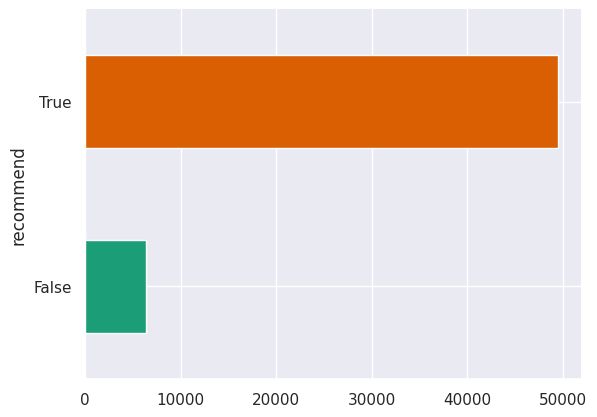

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
data_reviews_final.groupby('recommend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
# Verificar las columnas disponibles en df_games
print(data_reviews_final.columns)

# Eliminar duplicados basados en la columna 'id'
data_reviews_final = data_reviews_final.drop_duplicates(subset=['user_id'])

# Imprimir la información actualizada
print("Número de filas antes de eliminar duplicados:", len(data_reviews_final))

Index(['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id',
       'helpful', 'recommend', 'review'],
      dtype='object')
Número de filas antes de eliminar duplicados: 25486


In [30]:
data_reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25486 entries, 0 to 25799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      25485 non-null  object
 1   user_url     25485 non-null  object
 2   funny        25458 non-null  object
 3   posted       25458 non-null  object
 4   last_edited  25458 non-null  object
 5   item_id      25458 non-null  object
 6   helpful      25458 non-null  object
 7   recommend    25458 non-null  object
 8   review       25458 non-null  object
dtypes: object(9)
memory usage: 1.9+ MB


In [31]:
# Muestra el porcentajes de datos nulos por columnas
porcentajes_nulos = (data_reviews_final.isnull().mean() * 100).round(2)
porcentajes_nulos

user_id        0.00
user_url       0.00
funny          0.11
posted         0.11
last_edited    0.11
item_id        0.11
helpful        0.11
recommend      0.11
review         0.11
dtype: float64

In [32]:
data_reviews_final

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
2,evcentric,http://steamcommunity.com/id/evcentric,,Posted February 3.,,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...
3,doctr,http://steamcommunity.com/id/doctr,,"Posted October 14, 2013.",,250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...
4,maplemage,http://steamcommunity.com/id/maplemage,3 people found this review funny,"Posted April 15, 2014.",,211420,35 of 43 people (81%) found this review helpful,True,Git gud
...,...,...,...,...,...,...,...,...,...
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,,Posted June 17.,,730,0 of 1 people (0%) found this review helpful,True,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,1 person found this review funny,Posted June 23.,,570,1 of 1 people (100%) found this review helpful,True,Well Done
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 21.,,233270,No ratings yet,True,this is a very fun and nice 80s themed shooter...
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...


from matplotlib import pyplot as plt
import seaborn as sns
data_reviews_final.groupby('recommend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

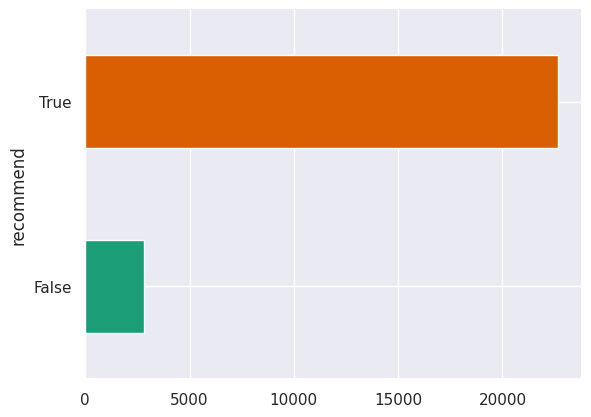

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
data_reviews_final.groupby('recommend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

---

**EDA:** *output_steam_games*

---

In [ ]:
#Carga y muestra el archivo
df_games = pd.read_json('/content/drive/MyDrive/MLOPS - ALLAN/1- DATASETS-FORMATO JSON/output_steam_games.json', lines=True)
df_games

<ipython-input-40-ee4f2963775c>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_games['release_date'] = pd.to_datetime(df_games['release_date'], errors='coerce')
<ipython-input-40-ee4f2963775c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['release_year'] = df_games['release_date'].dt.year


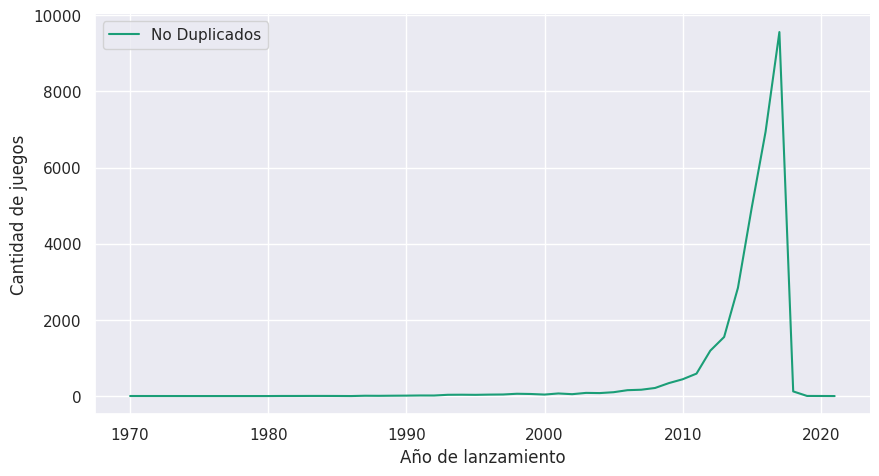

In [40]:

# Limpiar los valores no válidos en 'release_date'
df_games['release_date'] = df_games['release_date'].replace('"""Soon"""', pd.NaT)

# Convertir la columna 'release_date' a tipo datetime
df_games['release_date'] = pd.to_datetime(df_games['release_date'], errors='coerce')

# Eliminar filas con valores NaN en 'release_date'
df_games = df_games.dropna(subset=['release_date'])

# Crear una nueva columna 'release_year' para el año de lanzamiento
df_games['release_year'] = df_games['release_date'].dt.year

# Crear un nuevo DataFrame sin duplicados basados en la columna 'id'
df_games_no_duplicates = df_games.drop_duplicates(subset=['id'])

# Ordenar el DataFrame por 'release_date'
df_sorted_no_duplicates = df_games_no_duplicates.sort_values('release_date', ascending=True)

# Realizar el análisis exploratorio
fig, ax = plt.subplots(figsize=(10, 5.2))
plot_series_without_duplicates(df_sorted_no_duplicates, 'No Duplicados')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.legend()
plt.show()

In [41]:
df_games = df_games.dropna() # Drop rows with missing values
df_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,release_year
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro,2018
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL,2018
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290.0,Poolians.com,2017
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域,2017
88315,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,0.0,772540.0,Trickjump Games Ltd,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120439,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",http://steamcommunity.com/app/745400/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",1.99,0.0,745400.0,Bidoniera Games,2018
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS""",2018
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada,2018
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich,2018


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Visualizar las primeras filas de cada dataframe
print("Primeras filas de df_reviews:")
print(df_games.head())

# Información básica sobre los dataframes
print("\nInformación de df_reviews:")
print(df_games.info())

# Chequeo de nulos
print("\nNulos en df_reviews:")
print(df_games.isnull().sum())

# Análisis estadístico de datos
print("\nEstadísticas descriptivas de df_reviews:")
print(df_games.describe())



Primeras filas de df_reviews:
                 publisher                                             genres  \
88310            Kotoshiro      [Action, Casual, Indie, Simulation, Strategy]   
88311     Making Fun, Inc.               [Free to Play, Indie, RPG, Strategy]   
88312         Poolians.com  [Casual, Free to Play, Indie, Simulation, Sports]   
88313                 彼岸领域                        [Action, Adventure, Casual]   
88315  Trickjump Games Ltd                    [Action, Adventure, Simulation]   

                      app_name                    title  \
88310      Lost Summoner Kitty      Lost Summoner Kitty   
88311                Ironbound                Ironbound   
88312  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
88313                  弹炸人2222                  弹炸人2222   
88315    Battle Royale Trainer    Battle Royale Trainer   

                                                     url release_date  \
88310  http://store.steampowered.com/app/761140/Lost_..

<ipython-input-45-28dcfdec27fb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_games = df_games.corr()


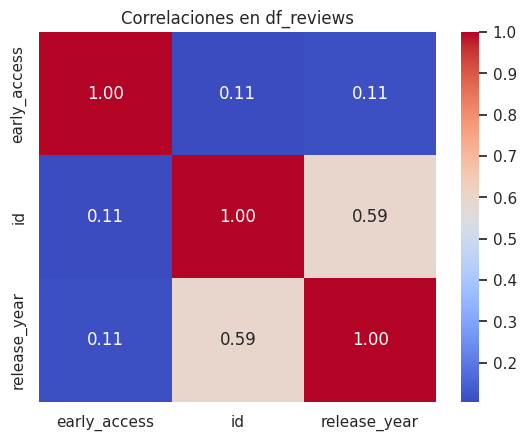

In [45]:
# Eliminar filas con valores NaN
df_games = df_games.dropna()

# Correlaciones en df_games después de eliminar NaN
corr_games = df_games.corr()
# Correlaciones en df_games después de eliminar NaN
corr_games = df_games.corr(numeric_only=True)

# Verificar si la matriz de correlación está vacía
if corr_games.empty:
    print("La matriz de correlación está vacía después de eliminar NaN. Revisa tus datos.")
else:
    # Crear un mapa de calor
    sns.heatmap(corr_games, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlaciones en df_reviews')
    plt.show()

In [65]:
# Verificar las columnas disponibles en df_games
print(df_games.columns)

# Eliminar duplicados basados en la columna 'id'
df_games_final = df_games.drop_duplicates(subset=['id'])

# Imprimir la información actualizada
print("Número de filas antes de eliminar duplicados:", len(df_games))
print("Número de filas después de eliminar duplicados:", len(df_games_final))

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer', 'release_year'],
      dtype='object')
Número de filas antes de eliminar duplicados: 22528
Número de filas después de eliminar duplicados: 22527


In [46]:
#Muestra los datos no nulos del dataFrame
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22528 entries, 88310 to 120443
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     22528 non-null  object        
 1   genres        22528 non-null  object        
 2   app_name      22528 non-null  object        
 3   title         22528 non-null  object        
 4   url           22528 non-null  object        
 5   release_date  22528 non-null  datetime64[ns]
 6   tags          22528 non-null  object        
 7   reviews_url   22528 non-null  object        
 8   specs         22528 non-null  object        
 9   price         22528 non-null  object        
 10  early_access  22528 non-null  float64       
 11  id            22528 non-null  float64       
 12  developer     22528 non-null  object        
 13  release_year  22528 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 2.6+ MB


In [47]:
# Muestra el porcentajes de datos nulos por columnas
porcentajes_nulos = (df_games.isnull().mean() * 100).round(2)
porcentajes_nulos

publisher       0.0
genres          0.0
app_name        0.0
title           0.0
url             0.0
release_date    0.0
tags            0.0
reviews_url     0.0
specs           0.0
price           0.0
early_access    0.0
id              0.0
developer       0.0
release_year    0.0
dtype: float64

---

**EDA:** *australian_users_items*

---



In [48]:
#Carga y muestra el archivo
df_items = load_json_lines('/content/drive/MyDrive/MLOPS - ALLAN/1- DATASETS-FORMATO JSON/australian_users_items.json')
df_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [50]:
# Visualizar las primeras filas de cada dataframe
print("Primeras filas de df_reviews:")
print(df_items.head())

# Información básica sobre los dataframes
print("\nInformación de df_reviews:")
print(df_items.info())

# Chequeo de nulos
print("\nNulos en df_reviews:")
print(df_items.isnull().sum())

# Análisis estadístico de datos
print("\nEstadísticas descriptivas de df_reviews:")
print(df_items.describe())

# Eliminar filas con valores NaN
df_items = df_items.dropna()

Primeras filas de df_reviews:
             user_id  items_count           steam_id  \
0  76561197970982479          277  76561197970982479   
1            js41637          888  76561198035864385   
2          evcentric          137  76561198007712555   
3         Riot-Punch          328  76561197963445855   
4              doctr          541  76561198002099482   

                                            user_url  \
0  http://steamcommunity.com/profiles/76561197970...   
1               http://steamcommunity.com/id/js41637   
2             http://steamcommunity.com/id/evcentric   
3            http://steamcommunity.com/id/Riot-Punch   
4                 http://steamcommunity.com/id/doctr   

                                               items  
0  [{'item_id': '10', 'item_name': 'Counter-Strik...  
1  [{'item_id': '10', 'item_name': 'Counter-Strik...  
2  [{'item_id': '1200', 'item_name': 'Red Orchest...  
3  [{'item_id': '10', 'item_name': 'Counter-Strik...  
4  [{'item_id': '300'

In [51]:
#Muestra los datos no nulos del dataFrame
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [52]:
# Muestra el porcentajes de datos nulos por columnas
porcentajes_nulos = (df_items.isnull().mean() * 100).round(2)
porcentajes_nulos

user_id        0.0
items_count    0.0
steam_id       0.0
user_url       0.0
items          0.0
dtype: float64

In [53]:
# Inicializa una lista para almacenar los DataFrames normalizados
lista_dataframes = []

# Itera sobre las filas de la columna 'items'
for index, fila in df_items['items'].iteritems():
    # Normaliza la fila actual y agrega el DataFrame resultante a la lista
    df_normalizado = pd.json_normalize(fila)
    lista_dataframes.append(df_normalizado)

<ipython-input-53-83acd6bc0da1>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, fila in df_items['items'].iteritems():


In [54]:
# Concatena todos los DataFrames normalizados en uno solo
data_items_col = pd.concat(lista_dataframes, ignore_index=True)
data_items_col

,item_id,item_name,playtime_forever,playtime_2weeks
0,10,Counter-Strike,6,0
1,20,Team Fortress Classic,0,0
2,30,Day of Defeat,7,0
3,40,Deathmatch Classic,0,0
4,50,Half-Life: Opposing Force,0,0
...,...,...,...,...
5153204,346330,BrainBread 2,0,0
5153205,373330,All Is Dust,0,0
5153206,388490,One Way To Die: Steam Edition,3,3
5153207,521570,You Have 10 Seconds 2,4,4


from matplotlib import pyplot as plt
data_items_col['playtime_forever'].plot(kind='hist', bins=20, title='playtime_forever')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_items_col['playtime_2weeks'].plot(kind='hist', bins=20, title='playtime_2weeks')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_items_col.plot(kind='scatter', x='playtime_forever', y='playtime_2weeks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_items_col['playtime_forever'].plot(kind='line', figsize=(8, 4), title='playtime_forever')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_items_col['playtime_2weeks'].plot(kind='line', figsize=(8, 4), title='playtime_2weeks')
plt.gca().spines[['top', 'right']].set_visible(False)

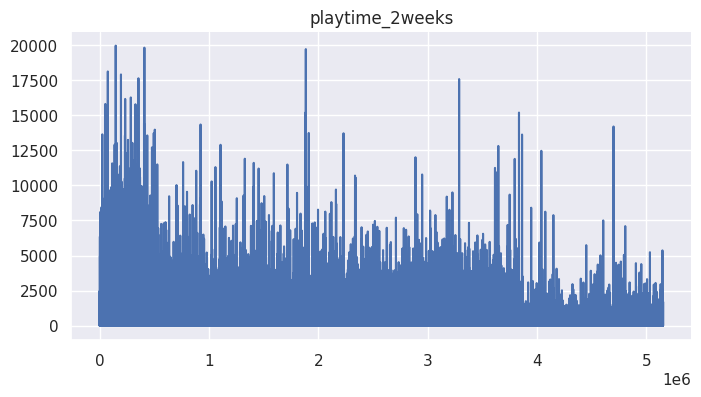

In [55]:
from matplotlib import pyplot as plt
data_items_col['playtime_2weeks'].plot(kind='line', figsize=(8, 4), title='playtime_2weeks')
plt.gca().spines[['top', 'right']].set_visible(False)

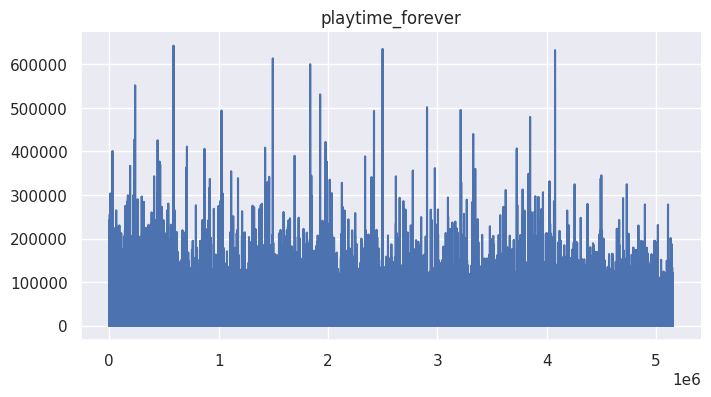

In [56]:
from matplotlib import pyplot as plt
data_items_col['playtime_forever'].plot(kind='line', figsize=(8, 4), title='playtime_forever')
plt.gca().spines[['top', 'right']].set_visible(False)

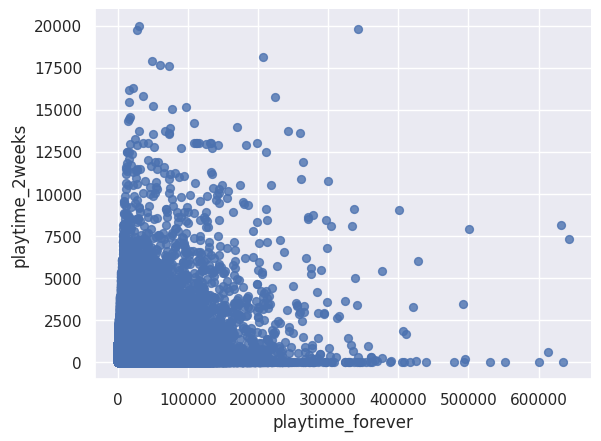

In [57]:
from matplotlib import pyplot as plt
data_items_col.plot(kind='scatter', x='playtime_forever', y='playtime_2weeks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [58]:
# Elimina la columna items anidada del DataFrame
df_items.drop(columns=['items'], inplace=True)

In [59]:
# Concatena el DataFrame original con la versión aplanada de la columna items
data_items_final = pd.concat([df_items, data_items_col], axis=1)
data_items_final

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,js41637,888.0,76561198035864385,http://steamcommunity.com/id/js41637,20,Team Fortress Classic,0,0
2,evcentric,137.0,76561198007712555,http://steamcommunity.com/id/evcentric,30,Day of Defeat,7,0
3,Riot-Punch,328.0,76561197963445855,http://steamcommunity.com/id/Riot-Punch,40,Deathmatch Classic,0,0
4,doctr,541.0,76561198002099482,http://steamcommunity.com/id/doctr,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...,...,...
5153204,NaN,NaN,NaN,NaN,346330,BrainBread 2,0,0
5153205,NaN,NaN,NaN,NaN,373330,All Is Dust,0,0
5153206,NaN,NaN,NaN,NaN,388490,One Way To Die: Steam Edition,3,3
5153207,NaN,NaN,NaN,NaN,521570,You Have 10 Seconds 2,4,4


from matplotlib import pyplot as plt
data_items_final['items_count'].plot(kind='hist', bins=20, title='items_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_items_final['playtime_forever'].plot(kind='hist', bins=20, title='playtime_forever')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_items_final['playtime_2weeks'].plot(kind='hist', bins=20, title='playtime_2weeks')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_items_final.plot(kind='scatter', x='items_count', y='playtime_forever', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_items_final.plot(kind='scatter', x='playtime_forever', y='playtime_2weeks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_items_final['items_count'].plot(kind='line', figsize=(8, 4), title='items_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_items_final['playtime_forever'].plot(kind='line', figsize=(8, 4), title='playtime_forever')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_items_final['playtime_2weeks'].plot(kind='line', figsize=(8, 4), title='playtime_2weeks')
plt.gca().spines[['top', 'right']].set_visible(False)

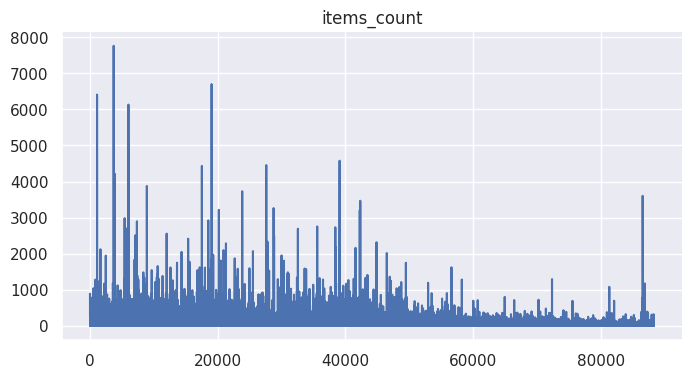

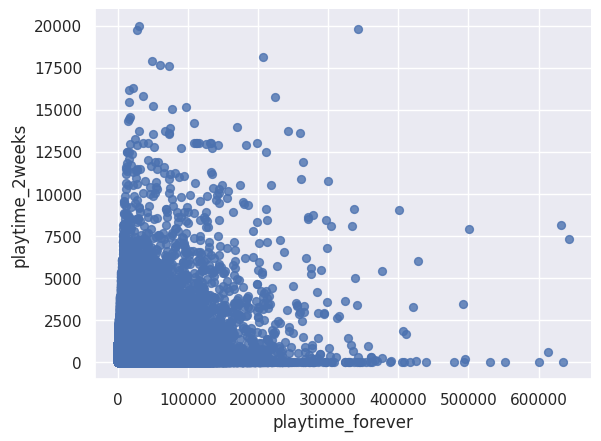

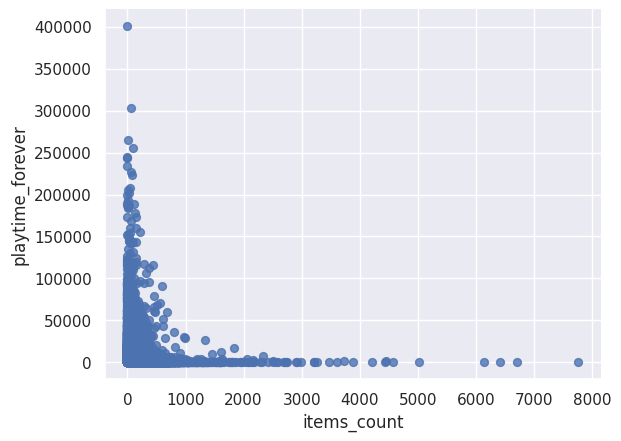

In [62]:
# miramos la distribucion de los datos en el dataframe
from matplotlib import pyplot as plt
data_items_final['items_count'].plot(kind='line', figsize=(8, 4), title='items_count')
plt.gca().spines[['top', 'right']].set_visible(False)

data_items_final.plot(kind='scatter', x='playtime_forever', y='playtime_2weeks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

data_items_final.plot(kind='scatter', x='items_count', y='playtime_forever', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [60]:
data_items_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       float64
 2   steam_id          object 
 3   user_url          object 
 4   item_id           object 
 5   item_name         object 
 6   playtime_forever  int64  
 7   playtime_2weeks   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 314.5+ MB


In [63]:
# Muestra el porcentajes de datos nulos por columnas
porcentajes_nulos = (data_items_final.isnull().mean() * 100).round(2)
porcentajes_nulos

user_id             98.29
items_count         98.29
steam_id            98.29
user_url            98.29
item_id              0.00
item_name            0.00
playtime_forever     0.00
playtime_2weeks      0.00
dtype: float64

---

**Exportar CSVs**

---

In [64]:
# Especifica el nombre del archivo CSV y la ruta donde deseas guardarlo
nombre_archivo_csv = 'data_reviews_final.csv'
ruta_guardado = '/content/drive/MyDrive/MLOPS - ALLAN/2- CSV/CSV_ETL/'

# Combina la ruta y el nombre del archivo
ruta_completa = ruta_guardado + nombre_archivo_csv

# Exporta el DataFrame a un archivo CSV
data_reviews_final.to_csv(ruta_completa, index=False)


# Imprime un mensaje de confirmación
print(f"DataFrame exportado exitosamente a: {ruta_completa}")

DataFrame exportado exitosamente a: /content/drive/MyDrive/MLOPS - ALLAN/2- CSV/CSV_ETL/data_reviews_final.csv


In [66]:
# Especifica el nombre del archivo CSV y la ruta donde deseas guardarlo
nombre_archivo_csv = 'data_games_final.csv'
ruta_guardado = '/content/drive/MyDrive/MLOPS - ALLAN/2- CSV/CSV_ETL/'

# Combina la ruta y el nombre del archivo
ruta_completa = ruta_guardado + nombre_archivo_csv

# Exporta el DataFrame a un archivo CSV
df_games.to_csv(ruta_completa, index=False)


# Imprime un mensaje de confirmación
print(f"DataFrame exportado exitosamente a: {ruta_completa}")

DataFrame exportado exitosamente a: /content/drive/MyDrive/MLOPS - ALLAN/2- CSV/CSV_ETL/data_games_final.csv


In [67]:
# Especifica el nombre del archivo CSV y la ruta donde deseas guardarlo
nombre_archivo_csv = 'data_items_final.csv'
ruta_guardado = '/content/drive/MyDrive/MLOPS - ALLAN/2- CSV/CSV_ETL/'

# Combina la ruta y el nombre del archivo
ruta_completa = ruta_guardado + nombre_archivo_csv

# Exporta el DataFrame a un archivo CSV
data_items_final.to_csv(ruta_completa, index=False)


# Imprime un mensaje de confirmación
print(f"DataFrame exportado exitosamente a: {ruta_completa}")

DataFrame exportado exitosamente a: /content/drive/MyDrive/MLOPS - ALLAN/2- CSV/CSV_ETL/data_items_final.csv
